<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_1_0_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we import the libraries that we are going to need.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

We are going to create a Perceptron class, which will include the variables needed to make our perceptron work.  
We set the bias to 1, as is common for a neuron, and initialize two empty variables for weights and errors. We also define the learning rate (lr) and the number of iterations (epochs).

***Functions of the Perceptron class:***

**__linear:** This function performs the calculation y = w_0 + w_1x_1 + ... + w_nx_n.  
The np.dot function multiplies two vectors element by element, which is what we need.

**__activation_step:** The activation function. np.where will return the value 1 when the input is >0 and 0 in all other cases.

**fit:** For each input, we calculate y_hat, which is the label estimated by the network, and compare it with y_target (the labels from the training dataset).

**predict:** The prediction function, which will allow us to perform inference on new data once the weights have been calculated.


In [5]:
class Perceptron(object):
    def __init__(self, lr=0.01, epochs=2000):
        self.lr = lr
        self.bias = 1
        self.epochs = epochs
        self.weights = None
        self.errors_ = []

    def __linear(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def __activation_step(self, Y):
        return np.where(Y >= 0, 1, 0)

    def fit(self, X, y):
        """
        Train the Perceptron model using input data X and labels y.
        """
        assert len(X) == len(y), "X and Y must have the same length."

        # Initialize weights to 0, except for the bias weight set to 1
        weights = np.zeros(X.shape[1])
        self.weights = np.insert(weights, 0, self.bias, axis=0)

        for _ in range(self.epochs):
            errors = 0
            for xi, y_target in zip(X, y):
                z = self.__linear(xi)  # Weighted sum
                y_hat = self.__activation_step(z)  # Activation function
                # Calculate the difference between target and prediction,
                # and apply the learning rate
                delta = self.lr * (y_target - y_hat)

                # Use the calculated delta parameter to update the weights
                self.weights[1:] += delta * xi
                self.weights[0] += delta

                errors += int(delta != 0.0)

            self.errors_.append(errors)
            # Stop training if error is 0
            if not errors:
                break

    def predict(self, X):
        """
        Predict outputs for new input data X.
        """
        assert type(self.weights) != 'NoneType', "Train the model first."
        y_hat = np.zeros(X.shape[0],)
        for i, xi in enumerate(X):
            y_hat[i] = self.__activation_step(self.__linear(xi))
        return y_hat

    def score(self, predictions, labels):
        """
        Calculate accuracy using predictions and true labels.
        """
        return accuracy_score(labels, predictions)

    def plot(self, predictions, labels):
        """
        Plot the decision boundary and data points.
        """
        assert type(self.weights) != 'NoneType', "Train the model first."
        plt.figure(figsize=(10, 8))
        plt.grid(True)

        for input, target in zip(predictions, labels):
            plt.plot(input[0], input[1], 'ro' if (target == 1.0) else 'go')

        for i in np.linspace(np.amin(predictions[:, :1]), np.amax(predictions[:, :1])):
            slope = -(self.weights[0] / self.weights[2]) / (self.weights[0] / self.weights[1])
            intercept = -self.weights[0] / self.weights[2]

            # y = mx + b, equation of a line. mx = slope, b = intercept
            y = (slope * i) + intercept
            plt.plot(i, y, color='black', marker='x', linestyle='dashed')


Now that we have everything necessary for our perceptron, let's see if it actually works.  
To do this, we use the `make_blobs` library from sklearn, which allows us to generate point clouds to use as training examples.


0.995

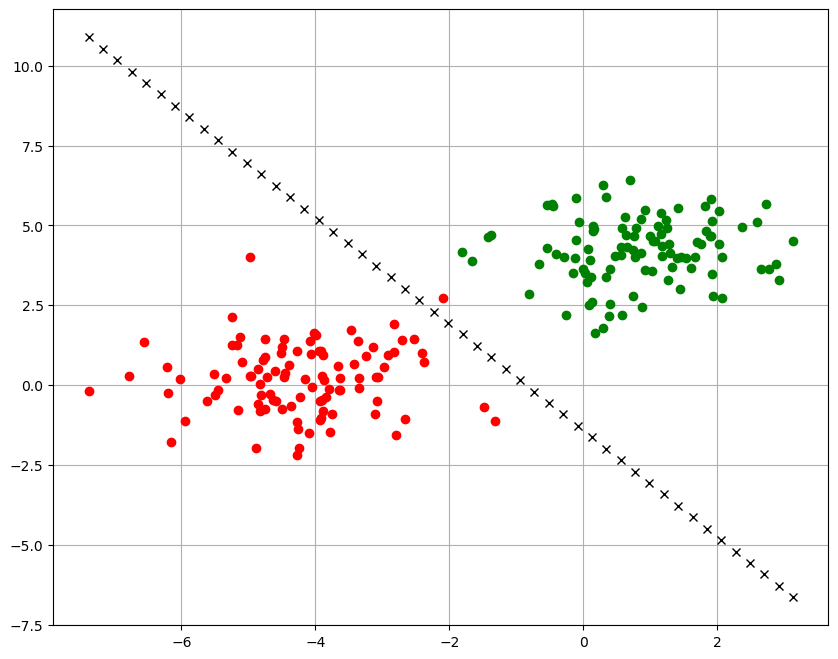

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

# Generate 2 clusters of points, each with 2 features
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.05, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# Initialize our perceptron
p = Perceptron()

# Fit the perceptron with the data generated by make_blobs
p.fit(X_train, y_train)
p.plot(X_test, y_test)
p.score(p.predict(X_test), y_test)
